In [1]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader("{}.JP".format(code), "stooq").sort_index()
  return df

In [2]:
!pip install mplfinance

     |████████████████████████████████| 70 kB 3.6 MB/s 


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

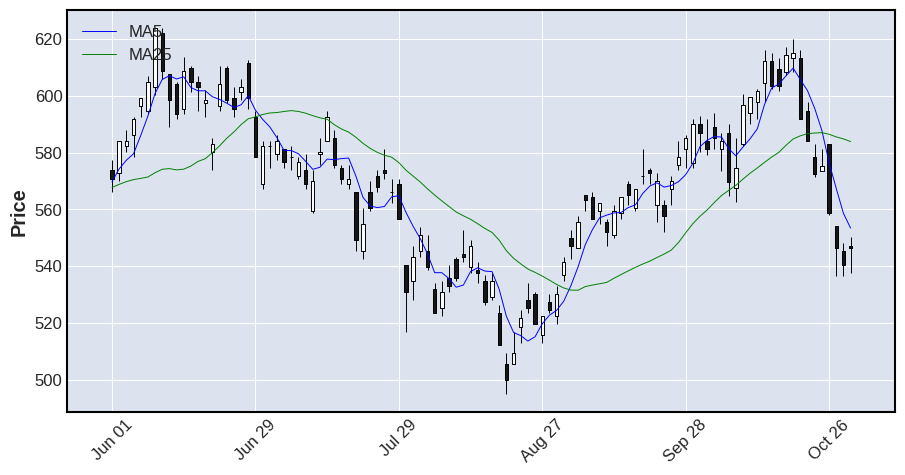

In [ ]:
import mplfinance as mpf
import datetime as dt
import talib as ta

df = get_stock_data(4902)  # コニカミノルタ
close = df["Close"]

df['ma5'] = ta.SMA(close ,timeperiod=5)
df['ma25'] = ta.SMA(close ,timeperiod=25)

rdf = df[dt.datetime(2021,6,1):dt.datetime(2021,10,31)]

apd  = [
          # 5日移動平均線
          mpf.make_addplot(rdf['ma5'], color='blue', panel=0, width=0.7),
          # 25日移動平均線
          mpf.make_addplot(rdf['ma25'], color='green', panel=0, width=0.7)
      ]

fig, axes = mpf.plot(rdf, type="candle", figratio=(2,1), addplot=apd, returnfig=True)
axes[0].legend(["MA5", "MA25"])
fig.show()

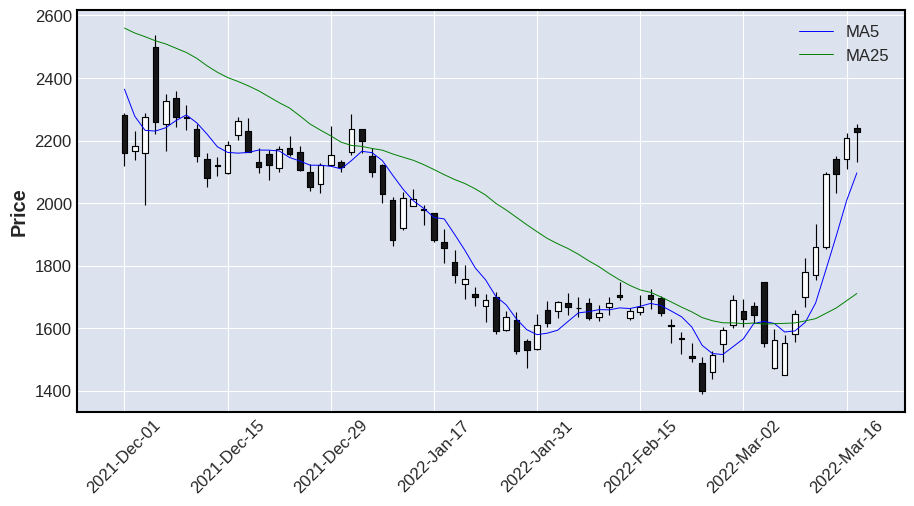

In [ ]:
df = get_stock_data(2929) 
close = df["Close"]

df['ma5'] = ta.SMA(close ,timeperiod=5)
df['ma25'] = ta.SMA(close ,timeperiod=25)

rdf = df[dt.datetime(2021,12,1):dt.datetime(2022,3,31)]

apd  = [
          # 5日移動平均線
          mpf.make_addplot(rdf['ma5'], color='blue', panel=0, width=0.7),
          # 25日移動平均線
          mpf.make_addplot(rdf['ma25'], color='green', panel=0, width=0.7)
      ]

fig, axes = mpf.plot(rdf, type="candle", figratio=(2,1), addplot=apd, returnfig=True)
axes[0].legend(["MA5", "MA25"])
fig.show()

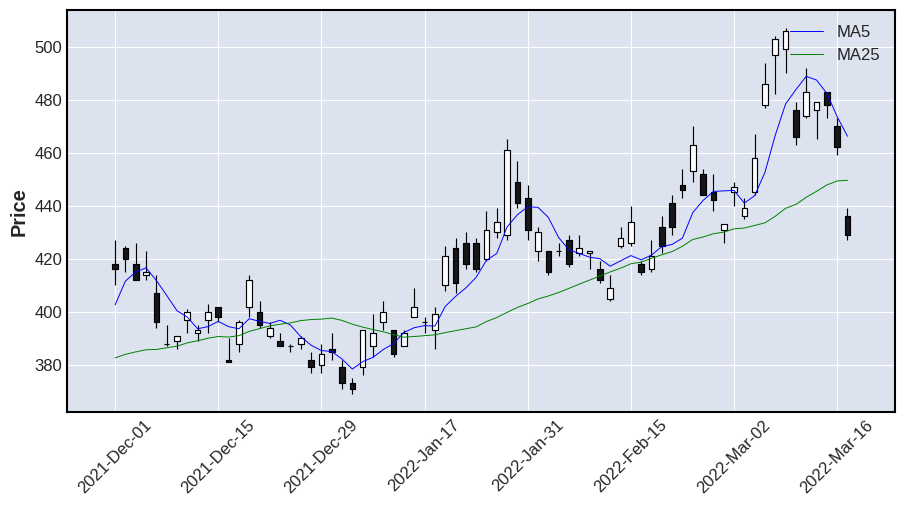

In [ ]:
df = get_stock_data(1357)  #日経ダブルインバース上場投信
close = df["Close"]

df['ma5'] = ta.SMA(close ,timeperiod=5)
df['ma25'] = ta.SMA(close ,timeperiod=25)

rdf = df[dt.datetime(2021,12,1):dt.datetime(2022,3,31)]

apd  = [
          mpf.make_addplot(rdf['ma5'], color='blue', panel=0, width=0.7),    # 5日移動平均線
          mpf.make_addplot(rdf['ma25'], color='green', panel=0, width=0.7)  # 25日移動平均線
      ]

fig, axes = mpf.plot(rdf, type="candle", figratio=(2,1), addplot=apd, returnfig=True)
axes[0].legend(["MA5", "MA25"])
fig.show()

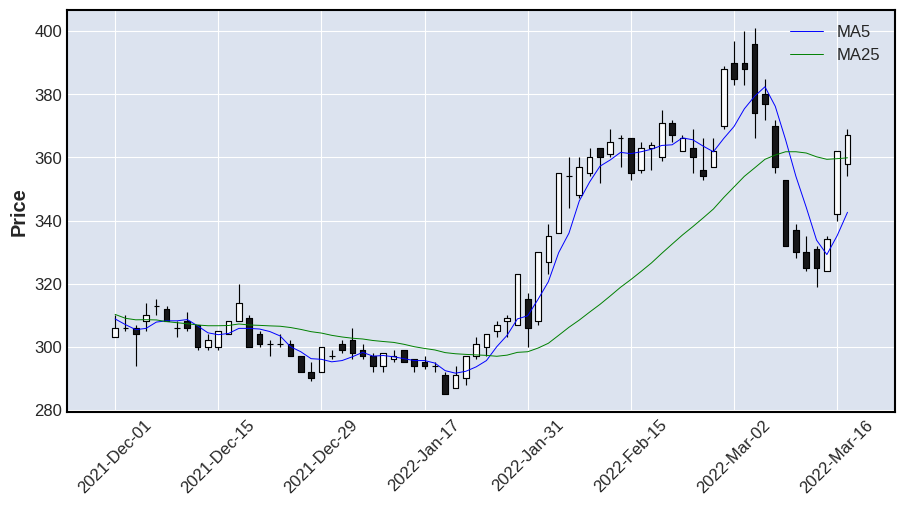

In [ ]:
df = get_stock_data(9501)  # 東京電力ホールディングス
close = df["Close"]

df['ma5'] = ta.SMA(close ,timeperiod=5)
df['ma25'] = ta.SMA(close ,timeperiod=25)

rdf = df[dt.datetime(2021,12,1):dt.datetime(2022,3,31)]

apd  = [
          mpf.make_addplot(rdf['ma5'], color='blue', panel=0, width=0.7),    # 5日移動平均線
          mpf.make_addplot(rdf['ma25'], color='green', panel=0, width=0.7)  # 25日移動平均線
      ]

fig, axes = mpf.plot(rdf, type="candle", figratio=(2,1), addplot=apd, returnfig=True)
axes[0].legend(["MA5", "MA25"])
fig.show()

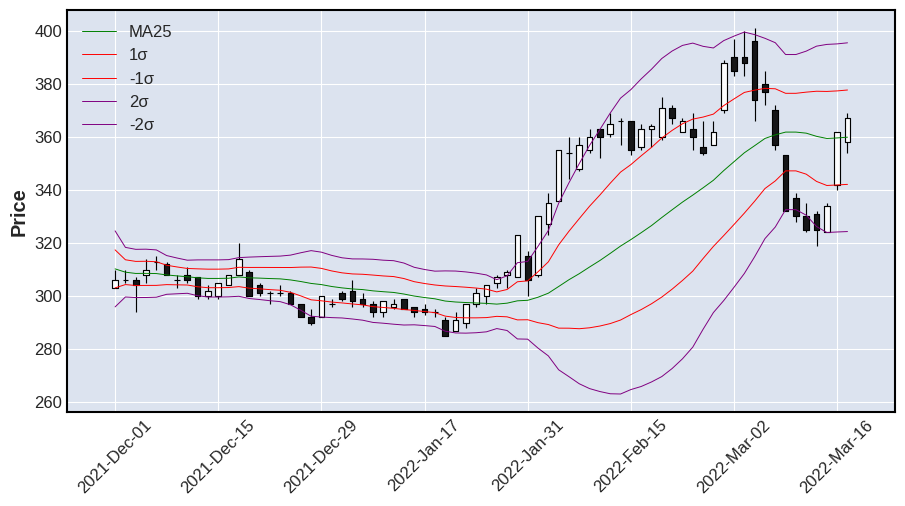

In [ ]:
df = get_stock_data(9501)  # 東京電力ホールディングス
close = df["Close"]

df['ma5'] = ta.SMA(close ,timeperiod=5)
df['ma25'] = ta.SMA(close ,timeperiod=25)

df['upper1'], df['middle'], df['lower1'] = ta.BBANDS(close, timeperiod=25, nbdevup=1, nbdevdn=1, matype=0)
df['upper2'], df['middle'], df['lower2'] = ta.BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=0)

rdf = df[dt.datetime(2021,12,1):dt.datetime(2022,3,31)]

apd  = [
          mpf.make_addplot(rdf['ma25'], color='green', panel=0, width=0.7),  # 25日移動平均線
          mpf.make_addplot(rdf['upper1'], panel=0, color='red', width=0.7),   # 1σ
          mpf.make_addplot(rdf['lower1'], panel=0, color='red', width=0.7),    # -1σ
          mpf.make_addplot(rdf['upper2'], panel=0, color='purple', width=0.7), # 2σ
          mpf.make_addplot(rdf['lower2'], panel=0, color='purple', width=0.7)  # -2σ
      ]

fig, axes = mpf.plot(rdf, type="candle", figratio=(2,1), addplot=apd, returnfig=True)
axes[0].legend(["MA25", "1σ", "-1σ", "2σ", "-2σ"])
fig.show()